# Bayesian computation in Python

## The case of simple linear regression

Herein follows a bit of a rant about Bayesian techniques (in preference over _unthinking_ application of hypothesis testing) and a quick demo of how to use `pymc3` and `emcee`.

Weapon of choice: Python 3 and Jupyter notebooks

# Linear regression

We start with a statistical model that we have an independent variable (or [input variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables) or predictor variable) $x$ which we know or control, and a dependent variable $y$ (or output variable or response variable) which we measure.  In simple linear regression we assume a linear, or straight line, relationship

$$ y = a + bx. $$

As measurement might contain noise, or because we might believe this model to be a simplification of reality, given data $(x_i)$ and $(y_i)$ we assume the actual relationship is

$$ y_i = a + bx_i + \epsilon_i $$

where $(\epsilon_i)$ are error terms.

We assume that the $(\epsilon_i)$ are _independent_ and _identically distributed_ with a normal distribution $N(0,\sigma^2)$.  That is, the mean of the error is $0$, and the standard deviation is $\sigma$.

# Input data

I'm going to use data from a really interesting article:

"Expectations of brilliance underlie gender distributions across academic disciplines." Sarah-Jane Leslie, Andrei Cimpian, Meredith Meyer, and Edward Freeland. Science, Vol. 347, Issue 6219, pp. 262-265. http://science.sciencemag.org/content/347/6219/262

The "supplement" to the article contains tables which give data.  I have processed these into a csv file.

Hat-tip: I got this reference from an [excellent blog post on the AMS website](https://blogs.ams.org/matheducation/2018/01/08/advice-for-new-doctoral-advisors/?utm_content=buffera7c38&utm_medium=social&utm_source=plus.google.com&utm_campaign=buffer).

In [1]:
import pandas as pd

In [2]:
frame = pd.read_csv("input.csv")
frame

,Discipline,FEM,AFR,ASI,FAB,FABW,FABM,HWOC,HWT,SELA,SELP,GRE,SYS,EMP,SvsE,SUIT,WEL,CHAL
0,ANTHROPOLOGY,59.6,4.2,6.3,3.72,3.90,3.39,3.05,6.95,9.25,9.14,NaN,6.13,5.43,0.70,1.90,5.70,4.70
1,ARCHAEOLOGY,52.3,1.3,3.9,3.76,3.81,3.72,4.03,6.77,9.33,9.40,NaN,6.17,3.38,2.78,2.39,4.70,5.43
2,ART_HISTORY,76.8,1.5,8.8,4.06,4.00,4.16,2.85,6.85,8.78,9.00,0.31,6.10,3.97,2.14,1.74,5.76,4.69
3,ASTRONOMY,29.2,1.5,6.1,4.13,4.36,3.99,4.49,6.40,8.50,8.33,NaN,6.31,2.29,4.03,2.01,4.80,4.94
4,BIOCHEMISTRY,45.4,5.0,10.6,4.25,3.79,4.35,5.30,7.67,7.88,7.75,NaN,6.28,2.93,3.34,2.38,5.41,4.07
5,CHEMISTRY,37.8,4.3,9.6,4.11,4.10,4.12,5.73,7.51,7.00,6.86,0.04,6.35,2.53,3.82,2.77,4.45,4.88
6,CLASSICS,41.8,0.0,2.9,4.34,4.58,4.22,3.83,6.75,9.29,9.20,NaN,5.83,4.21,1.63,1.90,5.29,4.50
7,COMMUNIC,64.2,7.4,4.6,3.79,3.68,3.94,3.38,6.80,9.16,9.21,-0.87,5.88,4.63,1.26,1.95,4.21,5.42
8,COMP_LIT,60.9,1.5,5.9,4.28,4.16,4.45,3.03,6.83,8.78,9.00,-0.04,5.86,4.43,1.43,1.97,5.56,3.84
9,COMP_SCI,18.6,3.3,19.9,4.29,4.35,4.28,3.84,6.60,9.36,9.50,-1.10,5.95,2.80,3.15,2.86,4.04,4.49


This unfortunately doesn't include the indicator variable for STEM or not, so we add this.

In [3]:
stem_lookup = {"ANTHROPOLOGY" : 0,
               "ARCHAEOLOGY" : 0,
               "ART_HISTORY" : 0,
               "ASTRONOMY" : 1,
               "BIOCHEMISTRY" : 1,
               "CHEMISTRY" : 1,
               "CLASSICS" : 0,
               "COMMUNIC" : 0,
               "COMP_LIT" : 0,
               "COMP_SCI" : 1,
               "EARTH_SCI" : 1,
               "ECONOMICS" : 0,
               "EDUCATION" : 0,
               "ENGINEERING" : 1,
               "ENGLISH_LIT" : 0,
               "EVOLUTION_BIO" : 1,
               "HISTORY" : 0,
               "LINGUISTICS" : 0,
               "MATH" : 1,
               "MID_EAST_STUD" : 0,
               "MOLEC_BIO" : 1,
               "MUS_TH_COM" : 0,
               "NEUROSCI" : 1,
               "PHILOSOPHY" : 0,
               "PHYSICS" : 1,
               "POLITICAL_SCI" : 0,
               "PSYCHOLOGY" : 0,
               "SOCIOLOLOGY" : 0,
               "SPANISH_LIT" : 0,
               "STATISTICS" : 1
              }

frame["STEM"] = frame["Discipline"].map(lambda x : stem_lookup[x])

In [4]:
# Check counts
assert sum(frame["STEM"]==0), sum(frame["STEM"]==1) == (18, 12)

In [5]:
# Save out for later
frame.to_csv("with_stem.csv")

# Standard regression

We wonder how much the STEM indicator can explain "FEM", the % of PhD recipients who are female (2011 NSF survey).  For future reference, here is the table from the paper:

![table](table.png)

We start by using `scipy` which comes "in the box" with Anaconda.  We can recompute the `t` value (from Model 1 in the table) but we cannot find $\beta$ yet.

In [5]:
import scipy.stats
import numpy as np

In [6]:
result = scipy.stats.linregress(frame["STEM"], frame["FEM"])
result

LinregressResult(slope=-16.711111111111109, intercept=52.644444444444439, rvalue=-0.49712337391743616, pvalue=0.0051931306098459088, stderr=5.512157878700302)

In [7]:
tvalue = np.sqrt(30-2) * result.rvalue / np.sqrt(1 - result.rvalue**2)
tvalue

-3.0316822338643501

### With Standardized Coefficients

See [Wikipedia](https://en.wikipedia.org/wiki/Standardized_coefficient).  Some trial + error and searching lead to this, which seems to now correctly reproduce the values from the 1st column of Table 1 in the article.

Essentially, both the dependent and independent variables are first "standardised" (translated and scaled to have 0 mean and unit variance).

In [8]:
stem = frame["STEM"].values
fem = frame["FEM"].values

stem = (stem - np.mean(stem)) / np.std(stem)
fem = (fem - np.mean(fem)) / np.std(fem)
result = scipy.stats.linregress(stem, fem)
result

LinregressResult(slope=-0.49712337391743627, intercept=3.0543907963232205e-16, rvalue=-0.49712337391743627, pvalue=0.0051931306098458915, stderr=0.16397608178208548)

This is the same as the `zscore` method from `scipy.stats` method.

In [9]:
from scipy.stats.mstats import zscore

stem = zscore(frame["STEM"])
fem = zscore(frame["FEM"])
result = scipy.stats.linregress(stem, fem)
result

LinregressResult(slope=-0.49712337391743627, intercept=3.0543907963232205e-16, rvalue=-0.49712337391743627, pvalue=0.0051931306098458915, stderr=0.16397608178208548)

In [10]:
tvalue = np.sqrt(30-2) * result.rvalue / np.sqrt(1 - result.rvalue**2)
tvalue

-3.031682233864351

# With `statsmodels`

An alternative and very powerful tool is the `statsmodels` package for Python.

- Install via `conda install statsmodels`
- An "R-like" interface.
- See [the docs](http://www.statsmodels.org/stable/index.html)

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
result = smf.ols('FEM ~ STEM', data=frame).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEM   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     9.191
Date:                Wed, 10 Jan 2018   Prob (F-statistic):            0.00519
Time:                        15:22:39   Log-Likelihood:                -122.35
No. Observations:                  30   AIC:                             248.7
Df Residuals:                      28   BIC:                             251.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.6444      3.486     15.101      0.000      45.503      59.786
STEM         -16.7111      5.512     -3.032      0.005     -28.002      -5.420
==============================================================================
Omnibus:                        1.528   Durbin-Watson:                   2.687
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.366
Skew:                          -0.484   Prob(JB):                        0.505
Kurtosis:                       2.608   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With standardised coefficients, and using the less-R-like interface

In [13]:
stem = zscore(frame["STEM"])
stem = sm.add_constant(stem)
fem = zscore(frame["FEM"])

result = sm.OLS(fem, stem).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     9.191
Date:                Wed, 10 Jan 2018   Prob (F-statistic):            0.00519
Time:                        15:22:39   Log-Likelihood:                -38.310
No. Observations:                  30   AIC:                             80.62
Df Residuals:                      28   BIC:                             83.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.331e-16      0.164   2.03e-15      1.000      -0.336       0.336
x1            -0.4971      0.164     -3.032      0.005      -0.833      -0.161
==============================================================================
Omnibus:                        1.528   Durbin-Watson:                   2.687
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.366
Skew:                          -0.484   Prob(JB):                        0.505
Kurtosis:                       2.608   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Statistics rant

So, we see that we get $p=0.005$, so this is "good", right?

First, let's plot the data.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

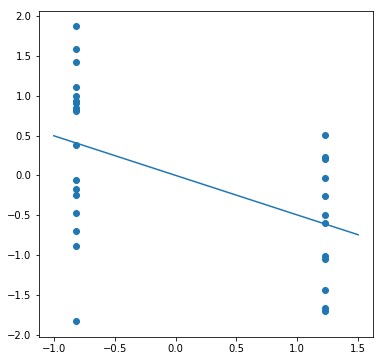

In [15]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(zscore(frame["STEM"]), zscore(frame["FEM"]))

a, b = result.params
x = np.linspace(-1, 1.5, 100)
y = a + b * x
ax.plot(x, y)

Not a terribly compelling _linear_ relationship...

The formal _hypothesis test_ that we are actually carrying out here is to test:

$$ H_0 : \beta = 0  \quad\text{against}\quad H_1 : \beta\not=0 $$

If $H_0$ were true (and the model were true) then $t$ would be distributed as a [t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) with $n-2$ degrees of freedom ($n$ is the number of observations, so here $n=30$).  We use a two-tailed distribution, so the following code reproduces the $p$-value we saw above.

In [16]:
tdist = scipy.stats.t(28)
tdist.cdf(-3.031682233864351) * 2

0.0051931306098458915

I want to stress that the following is the _correct_ interpretation of this $p$-value:

> Assume that the data really satisfies the model $x_i = a + e_i$ where $e_i$ are idd $N(0,\sigma^2)$ error terms.  That is, $H_0$ really does hold.  Then the probability of seeing data "as extreme" as the data we have is 0.005.

So we reject $H_0$ because seeing such data by chance, if the data really came from $H_0$, is very small.  Notice that this says nothing about $H_1$, and says rather little about what the "real" value of $\beta$ is.

# Adding further parameters

"Model 2" in the paper adds the FEM (Field-specific ability beliefs) variable in.

In [17]:
result = smf.ols('FEM ~ STEM + FAB', data=frame).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEM   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     15.66
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           3.06e-05
Time:                        15:22:39   Log-Likelihood:                -115.06
No. Observations:                  30   AIC:                             236.1
Df Residuals:                      27   BIC:                             240.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.2384     25.592      6.144      0.000     104.729     209.748
STEM         -14.2314      4.443     -3.203      0.003     -23.348      -5.115
FAB          -25.8009      6.275     -4.111      0.000     -38.677     -12.925
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   2.538
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.161
Skew:                          -0.044   Prob(JB):                        0.922
Kurtosis:                       2.651   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, it seems that we need to standardise the coefficients

In [22]:
x = np.asarray([zscore(frame["STEM"]), zscore(frame["FAB"])]).T
y = zscore(frame["FEM"])
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     16.24
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           2.08e-05
Time:                        15:23:37   Log-Likelihood:                -31.018
No. Observations:                  30   AIC:                             66.04
Df Residuals:                      28   BIC:                             68.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4234      0.130     -3.262      0.003      -0.689      -0.157
x2            -0.5434      0.130     -4.187      0.000      -0.809      -0.278
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   2.538
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.161
Skew:                          -0.044   Prob(JB):                        0.922
Kurtosis:                       2.651   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients, and $p$-values, and $R^2$, are all the same as the paper.  The $t$ values are slightly different...

## Do the rest while we're here

We now recreate Models 3, 4 and 5.  Again, the fitted coefficients match, but the $t$ and $p$ values don't quite match.

In [23]:
x = np.asarray([zscore(frame["STEM"]), zscore(frame["FAB"]), zscore(frame["HWOC"])]).T
y = zscore(frame["FEM"])
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     10.56
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           9.07e-05
Time:                        15:29:09   Log-Likelihood:                -30.926
No. Observations:                  30   AIC:                             67.85
Df Residuals:                      27   BIC:                             72.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3480      0.228     -1.529      0.138      -0.815       0.119
x2            -0.5620      0.140     -4.028      0.000      -0.848      -0.276
x3            -0.0919      0.226     -0.406      0.688      -0.557       0.373
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   2.577
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.245
Skew:                          -0.078   Prob(JB):                        0.885
Kurtosis:                       2.585   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x = np.asarray([zscore(frame["STEM"]), zscore(frame["FAB"]), zscore(frame["HWOC"]), zscore(frame["SELA"])]).T
y = zscore(frame["FEM"])
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     9.002
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           0.000106
Time:                        15:31:21   Log-Likelihood:                -29.531
No. Observations:                  30   AIC:                             67.06
Df Residuals:                      26   BIC:                             72.67
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3051      0.223     -1.368      0.183      -0.764       0.153
x2            -0.5762      0.136     -4.236      0.000      -0.856      -0.297
x3            -0.0052      0.227     -0.023      0.982      -0.472       0.461
x4             0.2375      0.149      1.592      0.123      -0.069       0.544
==============================================================================
Omnibus:                        0.329   Durbin-Watson:                   2.722
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.439
Skew:                           0.215   Prob(JB):                        0.803
Kurtosis:                       2.591   Cond. No.                         3.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
x = np.asarray([zscore(frame["STEM"]), zscore(frame["FAB"]), zscore(frame["HWOC"]),
                zscore(frame["SELA"]), zscore(frame["SvsE"])]).T
y = zscore(frame["FEM"])
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.953
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           0.000342
Time:                        15:32:09   Log-Likelihood:                -29.495
No. Observations:                  30   AIC:                             68.99
Df Residuals:                      25   BIC:                             76.00
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2772      0.255     -1.088      0.287      -0.802       0.247
x2            -0.5573      0.159     -3.509      0.002      -0.884      -0.230
x3             0.0205      0.254      0.081      0.936      -0.503       0.544
x4             0.2440      0.154      1.582      0.126      -0.074       0.562
x5            -0.0608      0.250     -0.243      0.810      -0.576       0.455
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   2.726
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.369
Skew:                           0.201   Prob(JB):                        0.832
Kurtosis:                       2.634   Cond. No.                         4.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""